In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Data
df_train = pd.read_csv('/home/sh0brun/Documents/Untitled Folder/train.csv')
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [3]:
#Take sample feature
sample_df_train = df_train[['LotArea','GarageArea','SalePrice']]
print(sample_df_train.head())

   LotArea  GarageArea  SalePrice
0     8450         548     208500
1     9600         460     181500
2    11250         608     223500
3     9550         642     140000
4    14260         836     250000


In [4]:
#Clean Data
sample_df_train = sample_df_train.dropna()

In [5]:
y_sample = sample_df_train['SalePrice']
sample_df_train = sample_df_train.drop('SalePrice',axis = 1)
# test = pd.merge(sample_df_train,y_sample,right_index = True,left_index = True)
# test

# Standardization


In [6]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
x_scaled = scaler.fit_transform(sample_df_train)
x_sample = pd.DataFrame(x_scaled, columns=sample_df_train.columns)

# Normalization
### Formula Transformation
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
<br> X_scaled = X_std * (max - min) + min
<br> nb: max and min given by feature_range

In [20]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1),copy=True)
# x_scaled = scaler.fit_transform(sample_df_train)

# x_sample = pd.DataFrame(x_scaled)
sampled = pd.merge(x_sample,y_sample,right_index = True, left_index = True)
# print(sampled)

       LotArea  GarageArea  SalePrice
0    -0.207142    0.351000     208500
1    -0.091886   -0.060731     181500
2     0.073480    0.631726     223500
3    -0.096897    0.790804     140000
4     0.375148    1.698485     250000
5     0.360616    0.032844     143000
6    -0.043379    0.762732     307000
7    -0.013513    0.051559     200000
8    -0.440659   -0.023301     129900
9    -0.310370   -1.253816     118000
10    0.068469   -0.416317     129500
11    0.141030    1.230608     345000
12    0.245661   -0.566038     144000
13    0.013547    1.717200     279500
14    0.040407   -0.566038     157000
15   -0.440659    0.482006     132000
16    0.072578    0.032844     149000
17    0.027478    0.201280      90000
18    0.318523    0.482006     159000
19   -0.296339   -0.837406     139000
20    0.370638    1.778024     325300
21   -0.307464   -0.902909     139400
22   -0.077655    0.285498     230000
23   -0.630680    0.463291     129900
24   -0.227587   -0.949696     154000
25    0.3721

# Create Train and Test Set from train.csv

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sampled,test_size = 0.3)
# print(train)
# print(test)
x_train = train.drop('SalePrice',axis = 1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']

# Predict

In [9]:
#Import support library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [10]:
K = 3
# Make the model
model = neighbors.KNeighborsRegressor(n_neighbors=K)

# Fitting 
model.fit(x_train,y_train)

# Prediction
prediction = model.predict(x_test)
prediction

array([144500.        , 304600.        , 140300.        , 211166.66666667,
       133666.66666667, 173644.        , 245833.33333333, 103666.66666667,
        61166.66666667, 233333.33333333, 132133.33333333, 178866.66666667,
       138500.        ,  89833.33333333, 155634.        , 180055.        ,
       291300.        , 281811.66666667, 117800.        , 283996.66666667,
       243500.        , 123800.        , 234666.66666667, 164333.33333333,
       187666.66666667, 295205.66666667, 136416.66666667, 182833.33333333,
       155666.66666667, 119500.        , 109725.        , 149000.        ,
       175916.66666667, 248753.66666667, 315623.33333333,  74133.33333333,
       182330.        , 531420.33333333, 124366.66666667, 179000.        ,
        69133.33333333, 129250.        , 173833.33333333, 210000.        ,
       125833.33333333, 100500.        , 160166.66666667, 136500.        ,
       157833.33333333, 158250.        , 119966.66666667, 114833.33333333,
       175916.66666667, 1

# Check Error

In [11]:
error = sqrt(mean_squared_error(y_test,prediction))
error

58944.43010482025

## Check Error with some 

In [12]:
all_error = [] 
str_error = []
for K in range(100):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
    #fitting
    model.fit(x_train,y_train)
    
    #prediction
    prediction = model.predict(x_test)
    
    #count error and store it
    error = sqrt(mean_squared_error(y_test,prediction))
    
    all_error.append(error)
    str_ ="RMSE for K = " + str(K) + " is " + str(error) 
    str_error.append(str_)
str_error

['RMSE for K = 1 is 71717.73958721789',
 'RMSE for K = 2 is 62645.67633384424',
 'RMSE for K = 3 is 58944.43010482025',
 'RMSE for K = 4 is 56730.46068313293',
 'RMSE for K = 5 is 55899.657992047265',
 'RMSE for K = 6 is 54217.58340853749',
 'RMSE for K = 7 is 53074.19527020949',
 'RMSE for K = 8 is 51604.764235911745',
 'RMSE for K = 9 is 51566.639209248184',
 'RMSE for K = 10 is 51145.30801551314',
 'RMSE for K = 11 is 51348.409475150824',
 'RMSE for K = 12 is 50871.14696736819',
 'RMSE for K = 13 is 50811.00690838498',
 'RMSE for K = 14 is 50560.536226000855',
 'RMSE for K = 15 is 50512.42546453896',
 'RMSE for K = 16 is 50670.42243916555',
 'RMSE for K = 17 is 50733.85304193488',
 'RMSE for K = 18 is 50612.67525871111',
 'RMSE for K = 19 is 50682.805730313274',
 'RMSE for K = 20 is 50814.82208605722',
 'RMSE for K = 21 is 50589.87798909482',
 'RMSE for K = 22 is 50417.86169624922',
 'RMSE for K = 23 is 50494.055895815225',
 'RMSE for K = 24 is 50360.97999895442',
 'RMSE for K = 25 

## Plotting

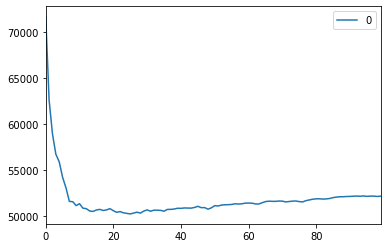

In [13]:
plot_curve = pd.DataFrame(all_error)
plot_curve.plot()


In [14]:
mini = all_error[0]
index = 0
for i in range(len(all_error)):
     if all_error[i]<mini :
            mini = all_error[i]
            index = i+1

print("The smallest value RMSE is ",mini," in index ",index)

The smallest value RMSE is  50242.35070453461  in index  26


## Predict Test.csv

### Load Data Test

In [15]:
df_test = pd.read_csv("/home/sh0brun/Documents/Untitled Folder/DataMining/test.csv");
df_test = df_test[['LotArea','GarageArea']]
df_test = df_test.dropna()
print(df_test)
# Predict


      LotArea  GarageArea
0       11622       730.0
1       14267       312.0
2       13830       482.0
3        9978       470.0
4        5005       506.0
5       10000       440.0
6        7980       420.0
7        8402       393.0
8       10176       506.0
9        8400       525.0
10       5858       511.0
11       1680       264.0
12       1680       320.0
13       2280       440.0
14       2280       308.0
15      12858       751.0
16      12883       868.0
17      11520       730.0
18      14122       678.0
19      14300       958.0
20      13650       756.0
21       7132       484.0
22      18494       430.0
23       3203       437.0
24      13300       400.0
25       8577       433.0
26      17433       962.0
27       8987       880.0
28       9215       676.0
29      10440       528.0
...       ...         ...
1429     7030       272.0
1430     9060       384.0
1431    12366         0.0
1432     9000         0.0
1433     8520         0.0
1434     5748       495.0
1435     384

### Normalization

In [16]:
test_scaled = scaler.fit_transform(df_test)
# test_scaled
test_scaled = pd.DataFrame(test_scaled)
print(test_scaled)

             0         1
0     0.363702  1.185538
1     0.897455 -0.740959
2     0.809270  0.042545
3     0.031948 -0.012761
4    -0.971588  0.153157
5     0.036388 -0.151027
6    -0.371242 -0.243203
7    -0.286084 -0.367642
8     0.071904  0.153157
9    -0.286487  0.240725
10   -0.799455  0.176201
11   -1.642563 -0.962183
12   -1.642563 -0.704088
13   -1.521484 -0.151027
14   -1.521484 -0.759394
15    0.613123  1.282324
16    0.618168  1.821559
17    0.343119  1.185538
18    0.868195  0.945878
19    0.904114  2.236354
20    0.772946  1.305368
21   -0.542366  0.051763
22    1.750451 -0.197115
23   -1.335226 -0.164853
24    0.702317 -0.335380
25   -0.250769 -0.183288
26    1.536344  2.254790
27   -0.168033  1.876865
28   -0.122023  0.936661
29    0.125178  0.254552
...        ...       ...
1428 -0.562949 -0.925312
1429 -0.153301 -0.409122
1430  0.513839 -2.178918
1431 -0.165409 -2.178918
1432 -0.262272 -2.178918
1433 -0.821653  0.102460
1434 -1.206278  0.240725
1435  2.776790  0.475776


In [17]:
K = index
model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(x_train,y_train)

predict = model.predict(test_scaled)
predict

array([314588.46153846, 173303.26923077, 218108.46153846, ...,
       236101.5       , 116950.        , 218333.15384615])

In [18]:
pd_predict = pd.DataFrame(predict)
result = pd.merge(df_test,pd_predict,right_index = True, left_index = True)
result.rename(columns = {0:"SalePrice"}, inplace = True)
print(result)

      LotArea  GarageArea      SalePrice
0       11622       730.0  314588.461538
1       14267       312.0  173303.269231
2       13830       482.0  218108.461538
3        9978       470.0  183321.153846
4        5005       506.0  164824.423077
5       10000       440.0  173028.461538
6        7980       420.0  148179.384615
7        8402       393.0  145795.961538
8       10176       506.0  190653.269231
9        8400       525.0  160025.769231
10       5858       511.0  177466.730769
11       1680       264.0  121091.269231
12       1680       320.0  128339.807692
13       2280       440.0  157549.615385
14       2280       308.0  127282.115385
15      12858       751.0  325074.192308
16      12883       868.0  351797.538462
17      11520       730.0  315665.384615
18      14122       678.0  280154.038462
19      14300       958.0  369575.192308
20      13650       756.0  344525.269231
21       7132       484.0  185389.115385
22      18494       430.0  193549.423077
23       3203   

In [19]:
result.

SyntaxError: invalid syntax (<ipython-input-19-47c30cf7607e>, line 1)